# Effects of Loan Characteristics on Their Yields

## Investigation Overview
In this investigation, I wanted to look at the characteristics of loans that were most important in predicting their estimated returns. The main focus was on yield, estimated loss, and ProsperScore

## Dataset Overview

The data consisted of rates and attributes of 114,000 loans in the dataset and I reduced the dataset down to 11 features of interest(Term, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperScore, ListingCategory, BorrowerState, EmploymentStatusDuration and IsBorrowerHomeowner). 

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [12]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

In [13]:
loan.drop(loan.iloc[:, 22:], inplace = True, axis = 1)
loan.drop(loan.iloc[:, 18:20], inplace = True, axis = 1)
loan.drop(loan.iloc[:, 13:15], inplace = True, axis = 1)
loan.drop(loan.iloc[:, 5:8], inplace = True, axis = 1)
loan.drop(loan.iloc[:, 0:4], inplace = True, axis = 1)


In [14]:
#Fill ProsperScore NaN to 0 to be able to convert it into an int
loan['ProsperScore'] = loan['ProsperScore'].fillna(0)

#Convert ProsperRating to int
loan['ProsperScore'] = loan['ProsperScore'].astype(int)

#Convert ListingCatergory 0 (not available)
loan['ListingCategory (numeric)'] = loan['ListingCategory (numeric)'].replace(0, np.nan)


#Convert ProsperScore and ListingCategory to strings
loan['ListingCategory (numeric)'] = loan['ListingCategory (numeric)'].astype(str)
loan['ProsperScore'] = loan['ProsperScore'].astype(str)

#Convert ProsperRating and CreditGrade into ordered categorical types
ordinal_var_dict = {'ProsperScore': ['1','2','3','4','5','6','7','8','9','10','11']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

In [15]:
loan = loan[loan['EstimatedReturn'].notnull()]
loan.head()

,Term,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),BorrowerState,EmploymentStatusDuration,IsBorrowerHomeowner
1,36,0.0920,0.0820,0.07960,0.0249,0.05470,7,2.0,CO,44.0,False
3,36,0.0974,0.0874,0.08490,0.0249,0.06000,9,16.0,GA,113.0,True
4,36,0.2085,0.1985,0.18316,0.0925,0.09066,4,2.0,MN,44.0,True
5,60,0.1314,0.1214,0.11567,0.0449,0.07077,10,1.0,NM,82.0,True
6,36,0.2712,0.2612,0.23820,0.1275,0.11070,2,1.0,KS,172.0,False


## Distribution of Estimated Returns
Estimated returns in the dataset take on a very large range of values, from about -20% at the lowest, to about 30% at the highest. The distribution is not even enough and tails off too far to be a normal distribution but it general shape is similar. The outliers were taken off in this histogram.

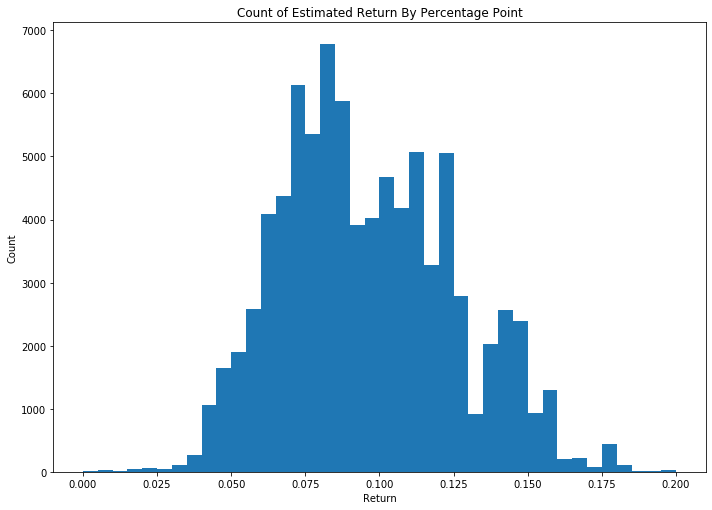

In [24]:
# start with a standard-scaled plot
binsize = .005
bins = np.arange(0, .2+binsize, binsize)

plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data = loan, x = 'EstimatedReturn', bins = bins)
plt.title('Count of Estimated Return By Percentage Point')
plt.xlabel('Return')
plt.ylabel('Count')
plt.show()

## Distribution of Lender Yields
Lender yields are the amount the lender would recieve if the loan was paid back in full given there are no chargeoffs, etc. There is a massive spike around a 30% yield which is an anomoly particularly because the rest of the histogram looks to have a shape resembling a normal distribution, particularly as you zoom out.

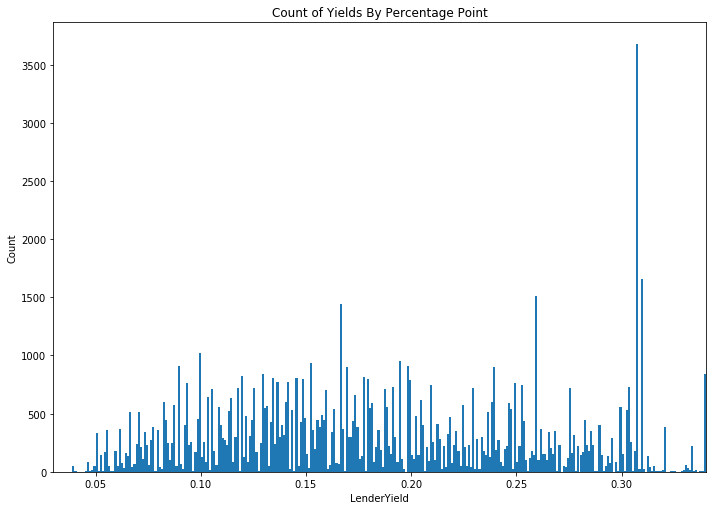

In [23]:
# plotting LenderYields on a standard scale
binsize = 0.001
bins = np.arange(0, loan['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[11.69, 8.27])
plt.hist(data = loan, x = 'LenderYield', bins = bins)
plt.xlim([loan['LenderYield'].min(), loan['LenderYield'].max()])
plt.xlabel('LenderYield')
plt.title('Count of Yields By Percentage Point')
plt.ylabel('Count')
plt.show()


## Heat Map of Numeric Variables

One very suprising factor was that the length of the loan had little impact on the estimated effective yield and employment status had little correlation with estimated loss.

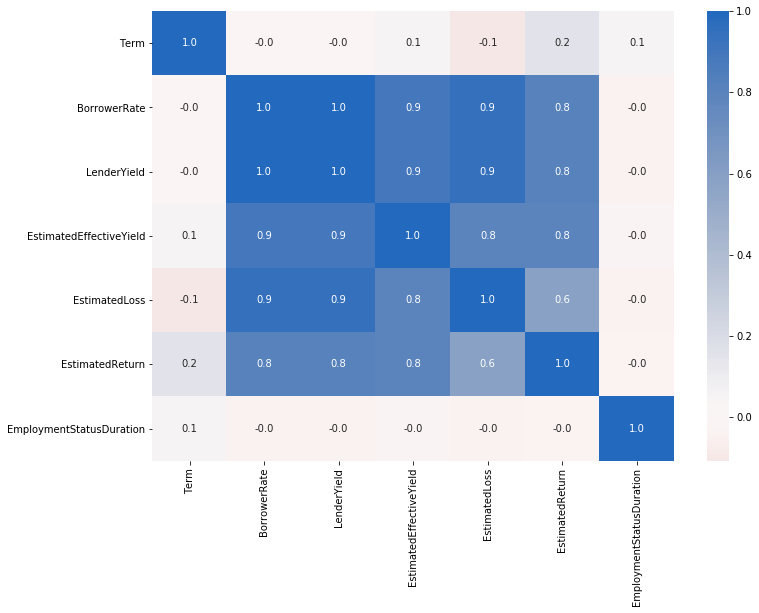

In [19]:
numeric_vars = ['Term', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn'
                , 'EmploymentStatusDuration']
categoric_vars = ['ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'IsBorrowerHomeowner']

plt.figure(figsize = [11.69, 8.27])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.1f',
           cmap = 'vlag_r', center = 0)
plt.show()

## Prosperity Score

It is very interesting to note how impactful ProsperScore is on LenderYields, EstimatedLosses and EstimatedEffectiveYield. Since people with higher prosperity typically lead to less losses (chargeoffs), lenders are willing to lend to them for a lower yield.

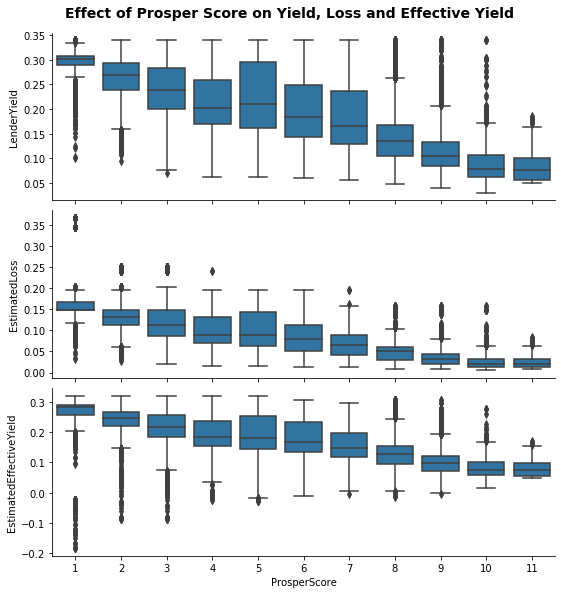

In [32]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

#Tried to keep Height and aspect consistent but it went off the screen in the presentation.
g = sb.PairGrid(data = loan, y_vars = ['LenderYield', 'EstimatedLoss','EstimatedEffectiveYield'], x_vars = 'ProsperScore',
                height = 8.27/3.2,  aspect = 14.70/5)
g.map(boxgrid)
plt.suptitle('Effect of Prosper Score on Yield, Loss and Effective Yield', fontsize = 14, weight = 'bold', y =1.04)
plt.show();

In [ ]:
*! jupyter nbconvert <notebook_name>.ipynb --to slides --post serve --template output_toggle*